# 바람직한 Weight training Weight 예측

DL Final project

2022125042 박종락

### 전처리 및 시각화

In [154]:
#필요한 library import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping


In [155]:
# Load the data
data_path = '/Users/jrock/Documents/Yonsei/DSL/24-2/EDA/elderly_rate(%).csv'
data = pd.read_csv(data_path)

# Extract the relevant data
years = data['Year'].values
elderly_rate = data['Elderly Ratio(%)'].values

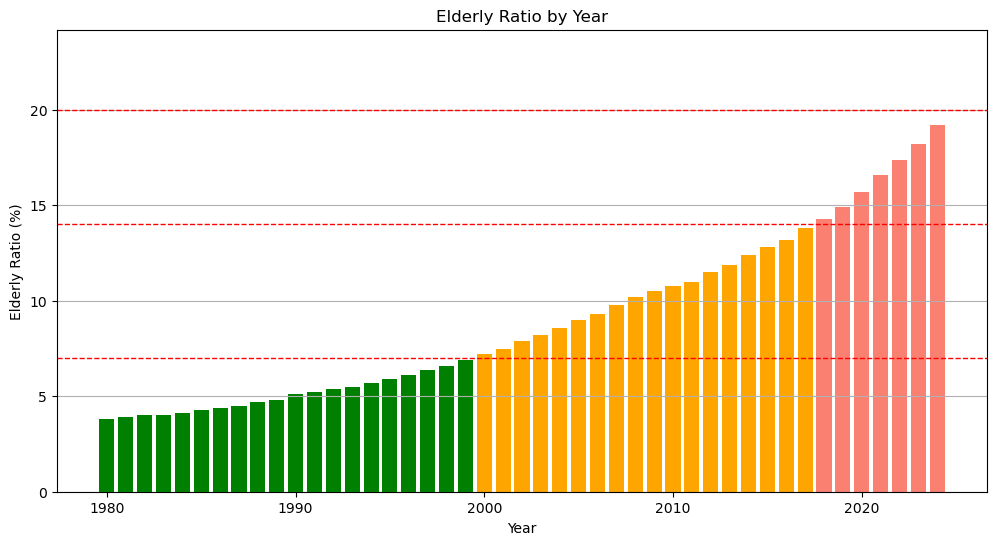

In [156]:
# 색상 설정
colors = []
for ratio in elderly_rate:
    if ratio < 7:
        colors.append('green')
    elif ratio < 14:
        colors.append('orange')
    elif ratio < 20:
        colors.append('salmon')
    else:
        colors.append('red')

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(years, elderly_rate, color=colors)
plt.title('Elderly Ratio by Year')
plt.xlabel('Year')
plt.ylabel('Elderly Ratio (%)')
plt.ylim(0, max(elderly_rate) + 5)
plt.grid(axis='y')

plt.axhline(y=7, color='red', linestyle='--', linewidth=1)
plt.axhline(y=14, color='red', linestyle='--', linewidth=1)
plt.axhline(y=20, color='red', linestyle='--', linewidth=1)


plt.show()

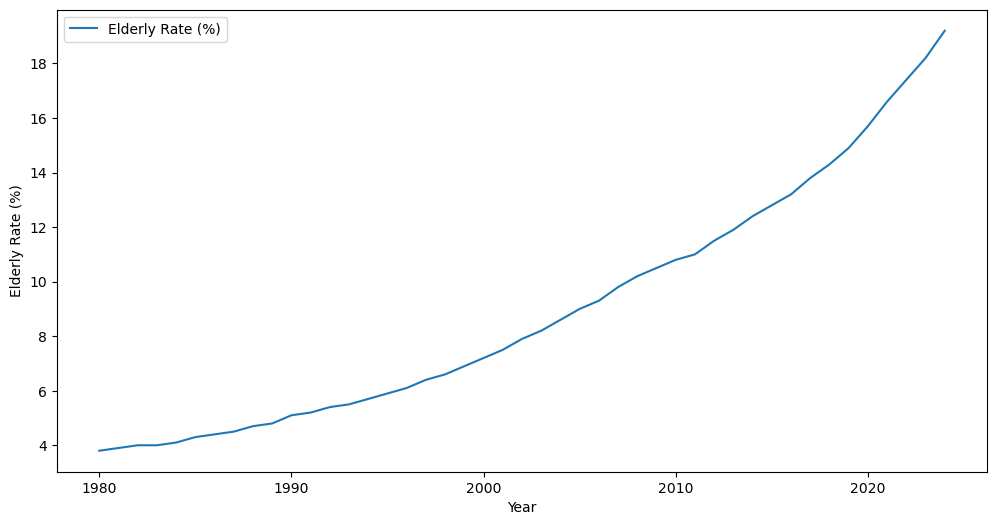

In [157]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(years, elderly_rate, label='Elderly Rate (%)')
plt.xlabel('Year')
plt.ylabel('Elderly Rate (%)')
plt.legend()
plt.show()

In [158]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
elderly_rate_scaled = scaler.fit_transform(elderly_rate.reshape(-1, 1))


In [237]:
# Prepare the data for LSTM
sequence_length =   7
X = []
y = []

for i in range(len(elderly_rate_scaled) - sequence_length):
    X.append(elderly_rate_scaled[i:i + sequence_length])
    y.append(elderly_rate_scaled[i + sequence_length])

X = np.array(X)
y = np.array(y)

In [238]:
# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [239]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(sequence_length, 1)))  # Increased LSTM units
model.add(LSTM(100, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))


/Users/jrock/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [240]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [241]:
# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [242]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, callbacks=[early_stop])


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 0.0774 - val_loss: 0.3185
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0346 - val_loss: 0.1066
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0080 - val_loss: 0.0043
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0124 - val_loss: 0.0035
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0155 - val_loss: 0.0030
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0055 - val_loss: 0.0276
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0026 - val_loss: 0.0587
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0058 - val_loss: 0.0682
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0075 - val_loss: 0.0484
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0046 - val_loss: 0.0194
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0010 - val_l

In [243]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


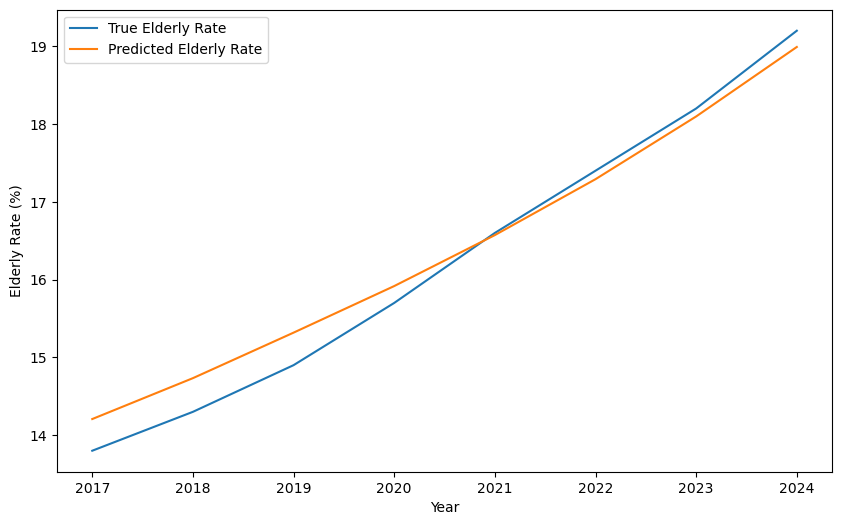

In [244]:
# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(years[split+sequence_length:], elderly_rate[split+sequence_length:], label='True Elderly Rate')
plt.plot(years[split+sequence_length:], predictions, label='Predicted Elderly Rate')
plt.xlabel('Year')
plt.ylabel('Elderly Rate (%)')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

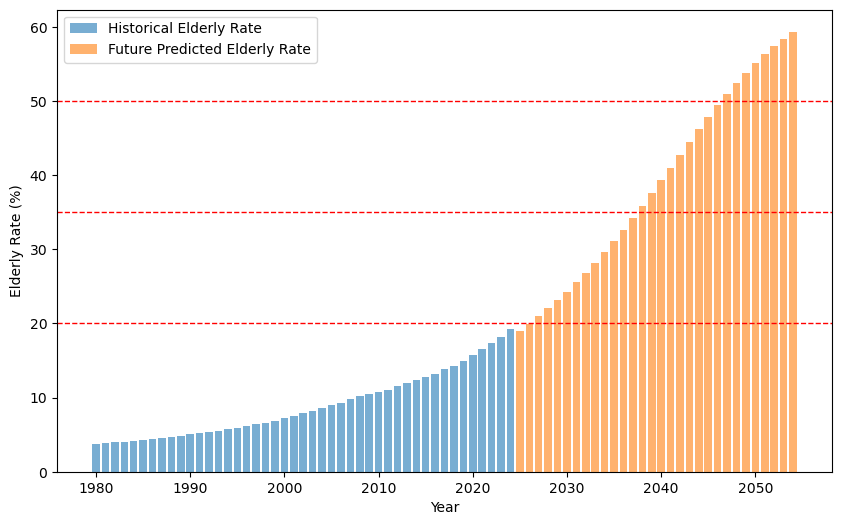

In [247]:
# Predict the next 30 years
future_predictions = []
last_sequence = X_test[-1]

for _ in range(30):
    next_prediction = model.predict(last_sequence.reshape(1, sequence_length, 1))
    future_predictions.append(next_prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], next_prediction, axis=0)

# Transform the predictions back to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot the future predictions as bar graph
future_years = np.arange(2025, 2025 + 30)
plt.figure(figsize=(10, 6))
plt.bar(years, elderly_rate, label='Historical Elderly Rate', alpha=0.6)
plt.bar(future_years, future_predictions.flatten(), label='Future Predicted Elderly Rate', alpha=0.6)
plt.xlabel('Year')
plt.ylabel('Elderly Rate (%)')
plt.legend()


plt.axhline(y=20, color='red', linestyle='--', linewidth=1)
plt.axhline(y=35, color='red', linestyle='--', linewidth=1)
plt.axhline(y=50, color='red', linestyle='--', linewidth=1)
plt.show()

